# Calculating models fairness.
I am going to calculate models fairness. I use adult income dataset. Models that I use are Random Forest Regressor and Logistic Regression.

First model that I use is RandomForestClassifier. I have already used RandomForestRegressor before. Difference is that Classifier outputs probability distribution over classes, not a single number. Later I apply bias mitigation methode 'roc-pivot' to the explainer.


                          recall  precision        f1  accuracy       auc
RandomForestClassifier  0.270557   0.886957  0.414634  0.817207  0.882288


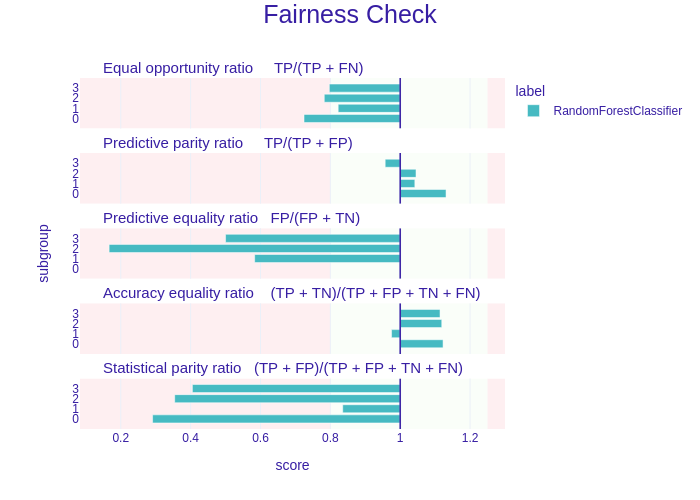

                          recall  precision        f1  accuracy       auc
RandomForestClassifier  0.202447    0.97007  0.334985  0.807666  0.882354


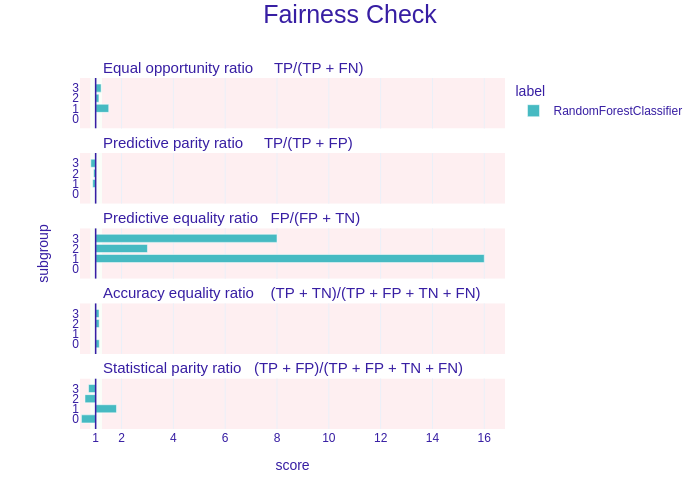

In [3]:
p1()

Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

                      recall  precision        f1  accuracy       auc
LogisticRegression  0.330966   0.599597  0.426508  0.787028  0.809132


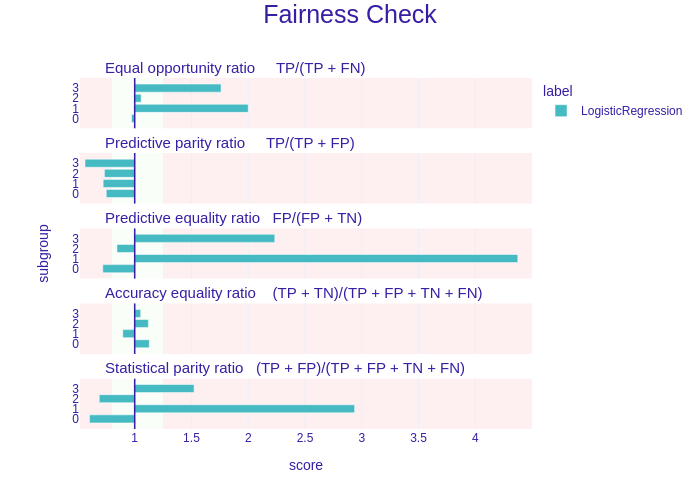

In [4]:
p2()

3. These coefficients differ between models, we can see many too low values for first one while same coefficients are too high or match norms in a second model.
4. After applying roc-pivot, there is no improvement, I have tried also with reweight, but it did not work either.
5. Based on these models I do not see correletion, all models are highly unfair.

In [2]:
import numpy as np
from dalex.fairness import reweight, roc_pivot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import dalex as dx
import plotly.io as pio
from IPython.display import display, Image
pio.renderers.default = "notebook"
warnings.filterwarnings("ignore")
def read_dataset():
    return pd.read_csv("adult.csv")


income_df = read_dataset()
income_df['education'].replace('Preschool', 'dropout',inplace=True)
income_df['education'].replace('10th', 'dropout',inplace=True)
income_df['education'].replace('11th', 'dropout',inplace=True)
income_df['education'].replace('12th', 'dropout',inplace=True)
income_df['education'].replace('1st-4th', 'dropout',inplace=True)
income_df['education'].replace('5th-6th', 'dropout',inplace=True)
income_df['education'].replace('7th-8th', 'dropout',inplace=True)
income_df['education'].replace('9th', 'dropout',inplace=True)
income_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
income_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
income_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
income_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
income_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
income_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
income_df['education'].replace('Masters', 'Masters',inplace=True)
income_df['education'].replace('Prof-school', 'Masters',inplace=True)
income_df['education'].replace('Doctorate', 'Doctorate',inplace=True)
income_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
income_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
income_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
income_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
income_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
income_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
income_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
income_df['race'] = income_df[['race']].apply(label_encoder.fit_transform)

income_df = income_df.apply(LabelEncoder().fit_transform)
income_df.head()

y=income_df['income']
x=income_df.drop('income', axis=1)
x.head()

def p1():
    model = RandomForestClassifier(n_estimators=10, max_depth=3)
    model.fit(x, y)
    exp = dx.Explainer(model, x, y, verbose=False)
    print(exp.model_performance().result)
    f_object = exp.model_fairness(protected=x['race'].values, privileged=np.where(label_encoder.classes_ == 'White')[0][0])
    fig = f_object.plot(show=False)
    #fig.write_image('1.png')
    display(Image(filename='1.png'))
    exp2 = roc_pivot(exp, protected=x['race'].values, privileged=np.where(label_encoder.classes_ == 'White')[0][0],
                     theta=0.02, verbose=False)
    print(exp2.model_performance().result)
    f_object2 = exp2.model_fairness(protected=x['race'].values, privileged=np.where(label_encoder.classes_ == 'White')[0][0])
    fig2 = f_object2.plot(show=False)
    #fig2.write_image('2.png')
    display(Image(filename='2.png'))

def p2():
    model = LogisticRegression()
    model.fit(x, y)
    exp = dx.Explainer(model, x, y, verbose=False)
    print(exp.model_performance().result)
    f_object = exp.model_fairness(protected=x['race'].values, privileged=np.where(label_encoder.classes_ == 'White')[0][0])
    fig = f_object.plot(show=False)
    #fig.write_image('3.png')
    display(Image(filename='3.png'))